# Walmart

# Walmart is an American multinational retail coorporation that operates a chain of hyper-markets, discount department stores, and grocery stores

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
train_df=pd.read_csv("D:\\Chandigarh University File\\dev town lecture\\files_dev\\train_walmart.csv")

In [3]:
features_df=pd.read_csv("D:\\Chandigarh University File\\dev town lecture\\files_dev\\features.csv")
stores_df=pd.read_csv("D:\\Chandigarh University File\\dev town lecture\\files_dev\\stores.csv")

In [4]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [8]:
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [9]:
stores_df.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [10]:
## inner join
dataset_m= features_df.merge(stores_df,how='inner',on='Store')

In [11]:
features_df.shape

(8190, 12)

In [12]:
dataset_m.shape

(8190, 14)

In [13]:
from datetime import datetime
dataset_m['Date']=pd.to_datetime(dataset_m['Date'])
train_df['Date']=pd.to_datetime(train_df['Date'])

In [14]:
df=train_df.merge(dataset_m,how='inner',on=['Store','Date','IsHoliday'])

In [15]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [16]:
df['week']=df.Date.dt.isocalendar().week

In [17]:
df['year']=df.Date.dt.isocalendar().year

In [18]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,2012


In [19]:
## visualization or eda
#make a function which will make a scatter plot and take arguements of df and column which we 
#want to plot against weekly sales

df.corr()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week,year
Store,1.000000,0.024004,-0.085195,-0.000548,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552,-0.182881,0.001031,0.002997
Dept,0.024004,1.000000,0.148032,0.000916,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837,-0.002966,0.000882,0.003738
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864,0.243828,0.027673,-0.010111
IsHoliday,-0.000548,0.000916,0.012774,1.000000,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460,0.000593,0.128184,-0.056746
Temperature,-0.050097,0.004437,-0.002312,-0.155949,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730,-0.058313,0.236276,0.065814
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853,0.003361,-0.031140,0.779633
MarkDown1,-0.119588,-0.002426,0.085251,-0.035586,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285,0.345673,-0.198076,0.141332
MarkDown2,-0.035173,0.000290,0.024130,0.334818,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940,0.108827,-0.000995,-0.222109
MarkDown3,-0.031556,0.001784,0.060385,0.427960,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818,0.048913,0.196307,-0.319162
MarkDown4,-0.009941,0.004257,0.045414,-0.000562,-0.063947,-0.044986,0.819238,-0.007768,-0.071095,1.000000,0.107792,-0.049628,0.024963,0.168196,-0.218477,0.126469


In [20]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week,year
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739,25.826762,2010.968591
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328,14.151887,0.796876
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000,1.000000,2010.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000,14.000000,2010.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000,26.000000,2011.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000,38.000000,2012.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,52.000000,2012.000000


In [21]:
def scatter(dff,column):
    plt.figure(figsize=(12,8))
    plt.scatter(dff[column],dff['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel('column')

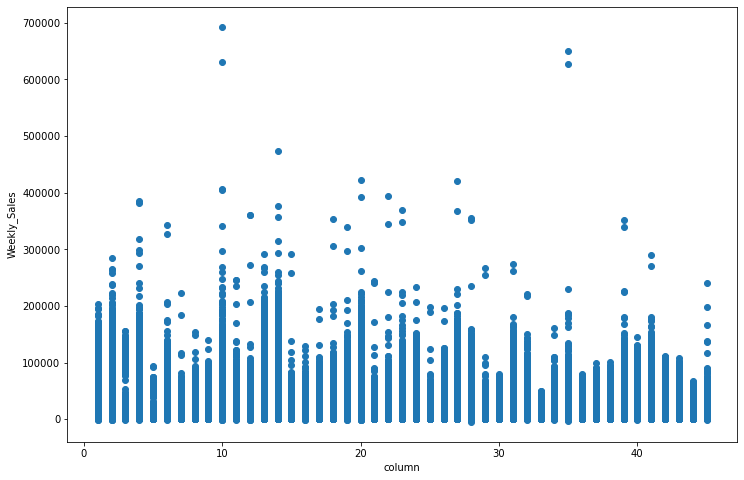

In [22]:
scatter(df,'Store')

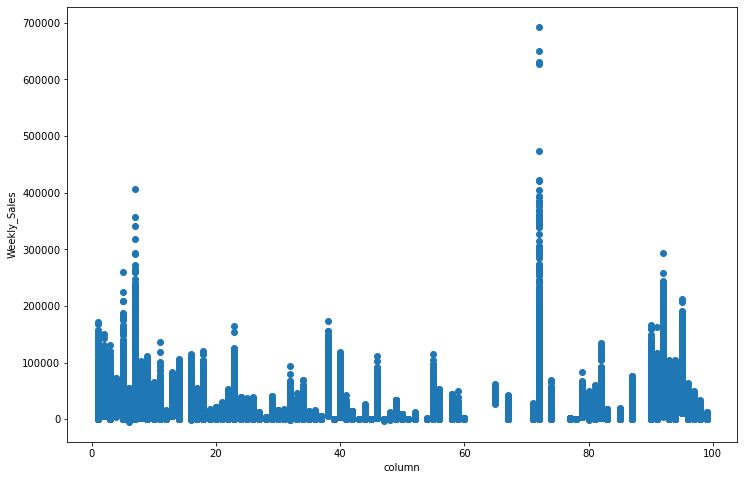

In [23]:
scatter(df,'Dept')

Text(0.5, 1.0, 'Weekly sales in 2011')

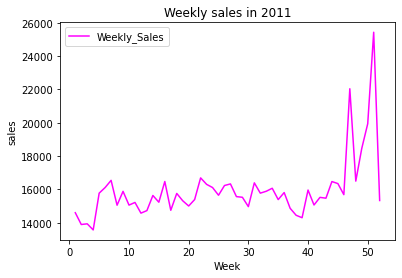

In [24]:
 #in year 2011 every weekly sales using a line plot ------------- filter the data of year 2011 groupby week and 
#do average of sales- two column
weekly_sale_2011=df[(df['year']==2011)]
weekly_sale_2011.groupby(['week'])['Weekly_Sales'].mean().plot(kind='line',color='magenta')
plt.xlabel('Week')
plt.ylabel('sales')
plt.legend()
plt.title('Weekly sales in 2011')

In [25]:
weekly_sale_2012=df[df['year']==2012].groupby(['week'])['Weekly_Sales'].mean()

<AxesSubplot:xlabel='week'>

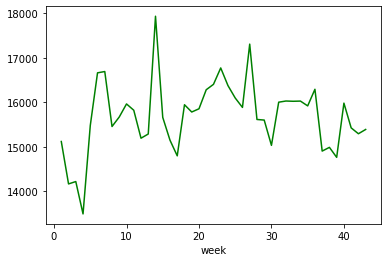

In [26]:
sns.lineplot(weekly_sale_2012.index,weekly_sale_2012.values,color='g')

In [27]:
weekly_sale_2010=df[df['year']==2010].groupby(['week'])['Weekly_Sales'].mean()

<AxesSubplot:xlabel='week'>

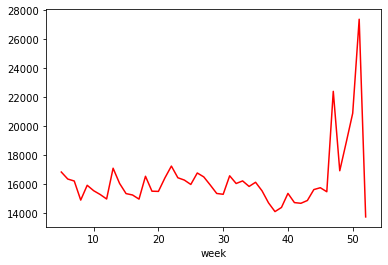

In [28]:
sns.lineplot(weekly_sale_2010.index,weekly_sale_2010.values,color='red')

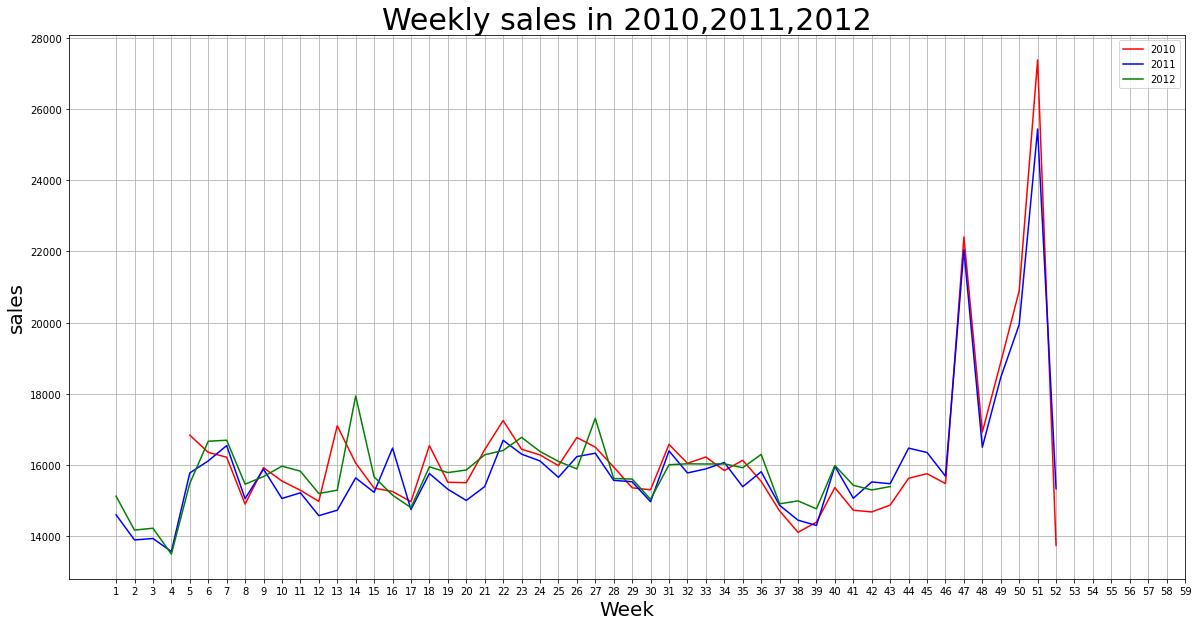

In [46]:
#combined plot

plt.figure(figsize=(20,10))
sns.lineplot(weekly_sale_2010.index,weekly_sale_2010.values,color='red')
weekly_sale_2011.groupby(['week'])['Weekly_Sales'].mean().plot(kind='line',color='b')
sns.lineplot(weekly_sale_2012.index,weekly_sale_2012.values,color='g')
plt.xlabel('Week',fontsize=20)
plt.ylabel('sales',fontsize=20)
plt.legend(['2010','2011','2012'])
plt.title('Weekly sales in 2010,2011,2012',fontsize=30)
plt.xticks(np.arange(1,60,step=1))
plt.grid()




plt.show()

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

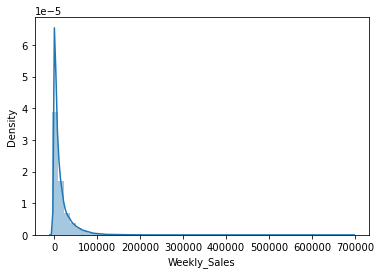

In [30]:
#data distribution of weekly sales
sns.distplot(df['Weekly_Sales'])

<AxesSubplot:xlabel='Type', ylabel='Size'>

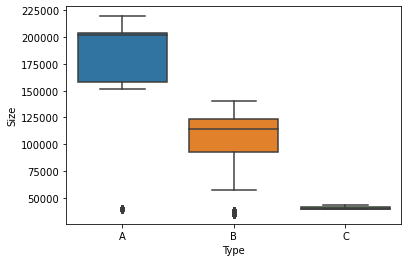

In [31]:
sns.boxplot(x='Type',y='Size',data=df)

In [56]:
#find out which 5 stores have highest average sale overall
weekly_sales_store=df.groupby(['Store'])['Weekly_Sales'].mean()
weekly_sales_store.sort_values(ascending=False).head()

Store
20    29508.301592
4     29161.210415
14    28784.851727
13    27355.136891
2     26898.070031
Name: Weekly_Sales, dtype: float64

In [63]:
#Method_2 
pd.DataFrame(weekly_sales_store).sort_values(by='Weekly_Sales',ascending=False).style.bar()

,Weekly_Sales
Store,
20,29508.301592
4,29161.210415
14,28784.851727
13,27355.136891
2,26898.070031
10,26332.303819
27,24826.984536
6,21913.243624
1,21710.543621


In [69]:
len(df.Store.unique())

45

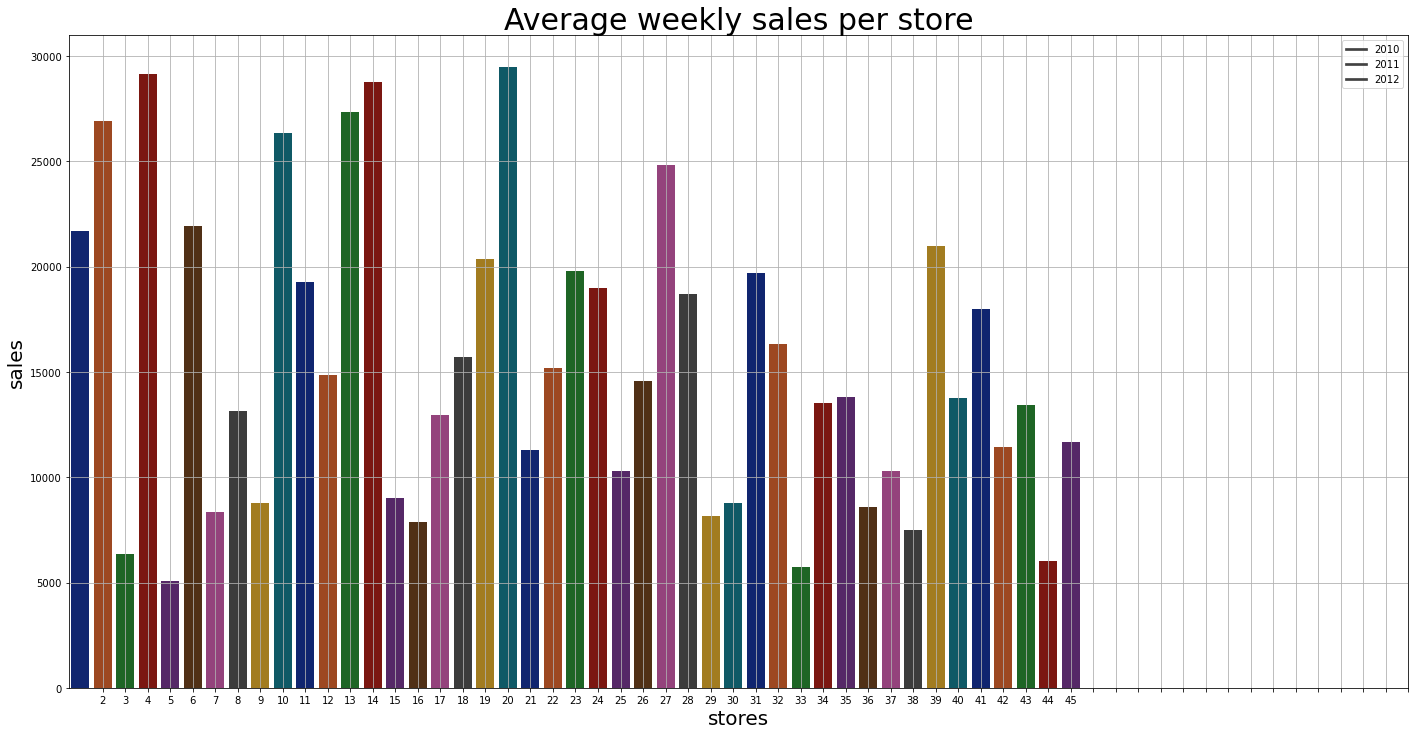

In [72]:
## bar graph having stores on x axis and avg weekly sales on y axis
#combined plot

plt.figure(figsize=(24,12))
sns.barplot(weekly_sales_store.index,weekly_sales_store.values,palette='dark')

plt.grid()
plt.title('Average weekly sales per store',fontsize=30)
plt.ylabel('sales',fontsize=20)
plt.xlabel('stores',fontsize=20)
plt.xticks(np.arange(1,60,1))
plt.legend(['2010','2011','2012'])

Text(0.5, 0, 'Dept')

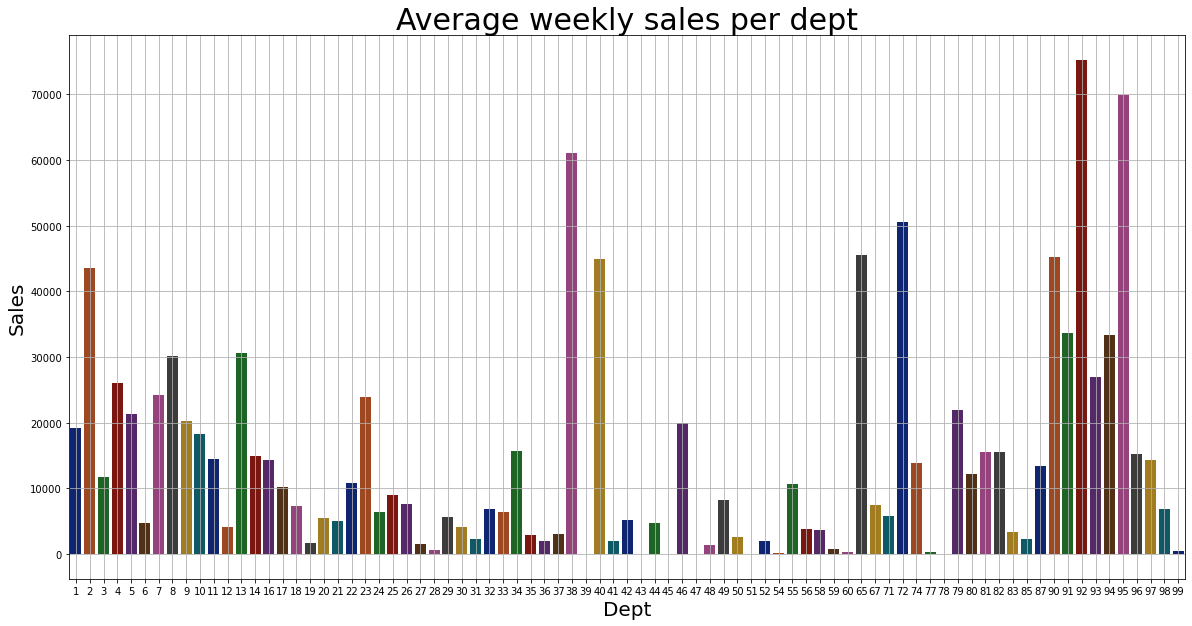

In [79]:
#here we have chek which dept. is selling high

weekly_sales_dept=df.groupby(['Dept'])['Weekly_Sales'].mean()
plt.figure(figsize=(20,10))
sns.barplot(weekly_sales_dept.index,weekly_sales_dept.values,palette='dark')

plt.grid()
plt.title('Average weekly sales per dept',fontsize=30)
plt.ylabel('Sales',fontsize=20)
plt.xlabel('Dept',fontsize=20)


In [80]:
weekly_sales_dept.sort_values(ascending=False)

Dept
92    75204.870531
95    69824.423080
38    61090.619568
72    50566.515417
65    45441.706224
          ...     
51       21.931729
39       11.123750
78        7.296638
43        1.193333
47       -7.682554
Name: Weekly_Sales, Length: 81, dtype: float64

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 [Text(0, 0.5, 'Store'),
  Text(0, 1.5, 'Dept'),
  Text(0, 2.5, 'Weekly_Sales'),
  Text(0, 3.5, 'IsHoliday'),
  Text(0, 4.5, 'Temperature'),
  Text(0, 5.5, 'Fuel_Price'),
  Text(0, 6.5, 'MarkDown1'),
  Text(0, 7.5, 'MarkDown2'),
  Text(0, 8.5, 'MarkDown3'),
  Text(0, 9.5, 'MarkDown4'),
  Text(0, 10.5, 'MarkDown5'),
  Text(0, 11.5, 'CPI'),
  Text(0, 12.5, 'Unemployment'),
  Text(0, 13.5, 'Size'),
  Text(0, 14.5, 'week'),
  Text(0, 15.5, 'year')])

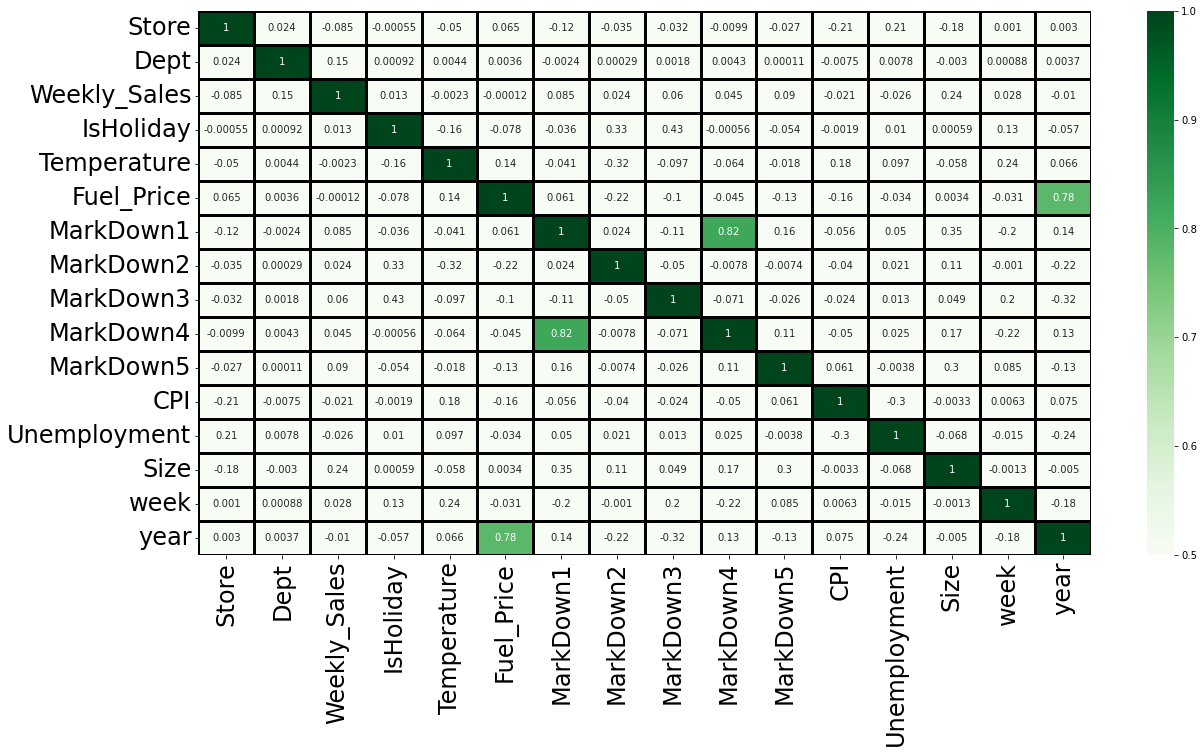

In [111]:
#heatmap of correlation matrix
plt.figure(figsize=(20,10))

sns.heatmap(df.corr(),vmin=0.5,cmap='Greens',linewidths=2.5,linecolor='black',annot=True)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

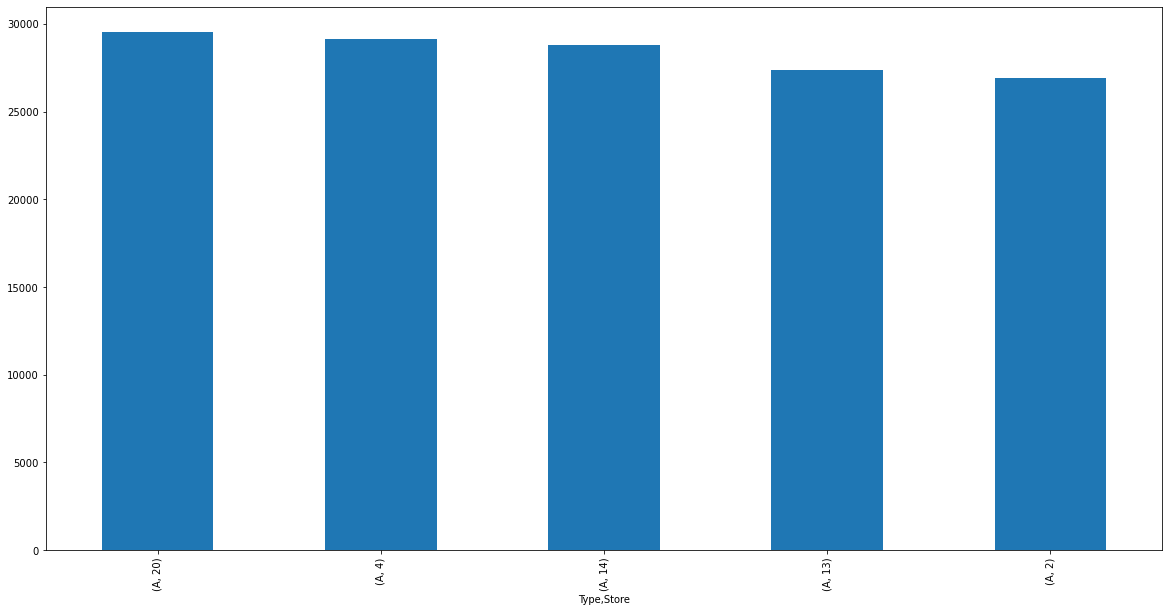

In [134]:
#check the type of the stores with highest avg sales and check the type of 5  stores with lowest average sales
plt.figure(figsize=(20,10))
highest_sales=df.groupby(['Type','Store'])['Weekly_Sales'].mean().sort_values(ascending=False).head().plot(kind='bar')

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

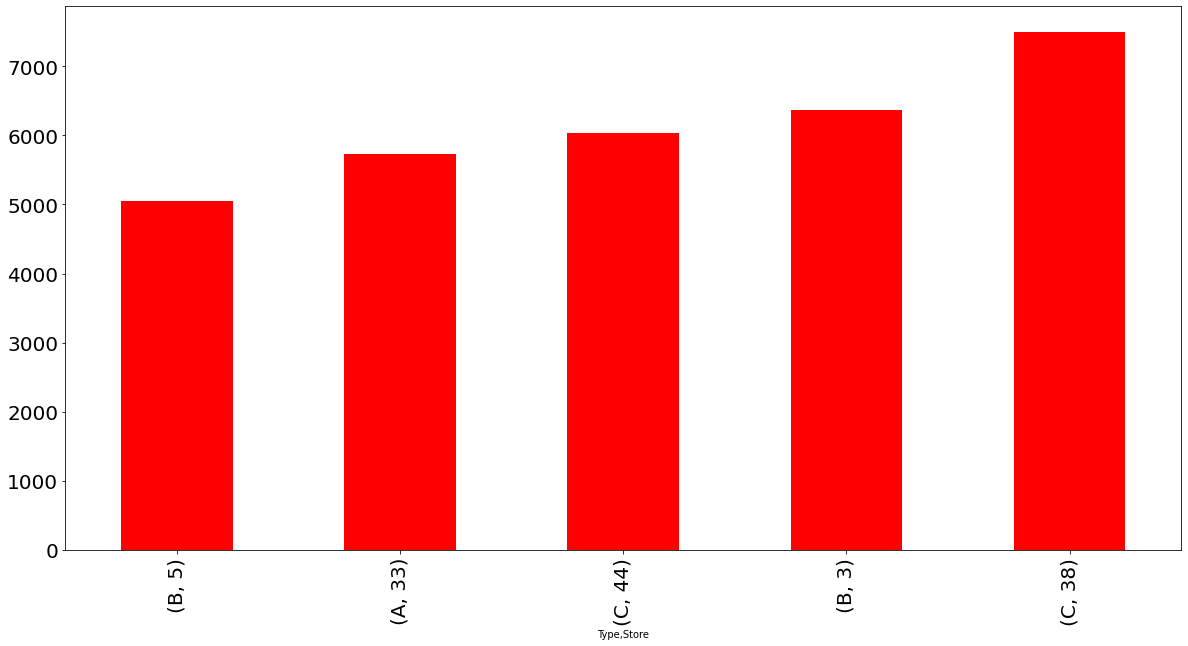

In [150]:
plt.figure(figsize=(20,10))
highest_sales=df.groupby(['Type','Store'])['Weekly_Sales'].mean().sort_values(ascending=True).head().plot(kind='bar',color='red')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

1. higher the size more is the sales
2. each year almost same pattern so demad can be planned accordingly by considering last year's patterns
3. end year is having higher sales
4. store 20 having highest average sales
5. dept 92 is having highest sales
6. dept 47 is having lowest sales
7. type a belongs to the larger sales
8. type c belongs to the smaller stores
9. some of the type a store is not performing well